# Import Libraries

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 10,10 
%matplotlib inline
from imblearn.over_sampling import SMOTE 
#from heatmap import heatmap, corrplot
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

plt.style.use('bmh')

# Exploratory Data Analysis

**Data Fields**


    attr1 - net profit / total assets
    attr2 - total liabilities / total assets
    attr3 - working capital / total assets
    attr4 - current assets / short-term liabilities
    attr5 - [(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation)] * 365
    attr6 - retained earnings / total assets
    attr7 - EBIT / total assets
    attr8 - book value of equity / total liabilities
    attr9 - sales / total assets
    attr10 - equity / total assets
    attr11 - (gross profit + extraordinary items + financial expenses) / total assets
    attr12 - gross profit / short-term liabilities
    attr13 - (gross profit + depreciation) / sales
    attr14 - (gross profit + interest) / total assets
    attr15 - (total liabilities * 365) / (gross profit + depreciation)
    attr16 - (gross profit + depreciation) / total liabilities
    attr17 - total assets / total liabilities
    attr18 - gross profit / total assets
    attr19 - gross profit / sales
    attr20 - (inventory * 365) / sales
    attr21 - sales (n) / sales (n-1)
    attr22 - profit on operating activities / total assets
    attr23 - net profit / sales
    attr24 - gross profit (in 3 years) / total assets
    attr25 - (equity - share capital) / total assets
    attr26 - (net profit + depreciation) / total liabilities
    attr27 - profit on operating activities / financial expenses
    attr28 - working capital / fixed assets
    attr29 - logarithm of total assets
    attr30 - (total liabilities - cash) / sales
    attr31 - (gross profit + interest) / sales
    attr32 - (current liabilities * 365) / cost of products sold
    attr33 - operating expenses / short-term liabilities
    attr34 - operating expenses / total liabilities
    attr35 - profit on sales / total assets
    attr36 - total sales / total assets
    attr37 - (current assets - inventories) / long-term liabilities
    attr38 - constant capital / total assets
    attr39 - profit on sales / sales
    attr40 - (current assets - inventory - receivables) / short-term liabilities
    attr41 - total liabilities / ((profit on operating activities + depreciation) * (12/365))
    attr42 - profit on operating activities / sales
    attr43 - rotation receivables + inventory turnover in days
    attr44 - (receivables * 365) / sales
    attr45 - net profit / inventory
    attr46 - (current assets - inventory) / short-term liabilities
    attr47 - (inventory * 365) / cost of products sold
    attr48 - EBITDA (profit on operating activities - depreciation) / total assets
    attr49 - EBITDA (profit on operating activities - depreciation) / sales
    attr50 - current assets / total liabilities
    attr51 - short-term liabilities / total assets
    attr52 - (short-term liabilities * 365) / cost of products sold)
    attr53 - equity / fixed assets
    attr54 - constant capital / fixed assets
    attr55 - working capital
    attr56 - (sales - cost of products sold) / sales
    attr57 - (current assets - inventory - short-term liabilities) / (sales - gross profit - depreciation)
    attr58 - total costs /total sales
    attr59 - long-term liabilities / equity
    attr60 - sales / inventory
    attr61 - sales / receivables
    attr62 - (short-term liabilities *365) / sales
    attr63 - sales / short-term liabilities
    attr64 - sales / fixed assets
    class - the response variable Y: 0 = did not bankrupt; 1 = bankrupt


In [24]:
df1 = pd.read_csv("/content/drive/My Drive/Machine Learning/bankruptcy_Train.csv")
df1.head()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,Attr11,Attr12,Attr13,Attr14,Attr15,Attr16,Attr17,Attr18,Attr19,Attr20,Attr21,Attr22,Attr23,Attr24,Attr25,Attr26,Attr27,Attr28,Attr29,Attr30,Attr31,Attr32,Attr33,Attr34,Attr35,Attr36,Attr37,Attr38,Attr39,Attr40,Attr41,Attr42,Attr43,Attr44,Attr45,Attr46,Attr47,Attr48,Attr49,Attr50,Attr51,Attr52,Attr53,Attr54,Attr55,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
0,-0.031545,-0.091313,-0.040269,-0.013529,0.007406,-0.016047,-0.000264,0.641242,-0.748385,0.126789,-0.214423,-0.036576,-0.010930,-0.000269,-0.005305,-0.242796,0.579994,-0.002400,0.029265,-0.070344,-0.016440,-0.403174,0.033091,-0.004522,0.050225,-0.206675,-0.009990,-0.019370,-0.631107,-0.015546,0.066220,-0.013968,-0.368646,-0.144382,-0.435600,-0.974157,-0.034079,0.079760,-0.016173,0.181241,-0.007215,-0.013949,-0.019305,-0.009084,0.017225,0.147450,-0.041943,-0.147901,0.004856,-0.192331,-1.027090,-0.013322,-0.016363,-0.018113,-0.110578,0.014367,0.005457,-0.014143,-0.020924,0.068399,-0.214478,-0.013915,-0.173939,-0.046788,0
1,-0.231729,-0.049448,0.304381,-0.080975,0.007515,-0.016047,-0.034963,0.074710,0.469815,0.073759,-0.835505,-0.299606,-0.013057,-0.034968,-0.119627,-0.603332,0.040666,-0.036566,-0.025914,-0.047947,-0.016961,-0.873423,-0.022188,0.048932,0.274101,-0.591456,-0.010933,-0.015829,-1.168550,-0.022214,-0.031486,-0.023158,0.021977,1.228971,-0.986256,0.189765,-0.024464,0.011069,-0.052642,-0.088079,-0.007880,-0.039637,-0.016443,-0.009659,0.002374,-0.013532,-0.035025,-0.789621,-0.025223,0.186782,-0.079059,-0.022531,-0.003012,-0.014462,-0.114919,0.008492,-0.008385,-0.008666,-0.023095,-0.033498,-0.205796,-0.015174,-0.073056,-0.027236,0
2,-0.058602,0.065060,-0.488404,-0.189489,0.006572,-0.016047,-0.004954,-0.456287,0.270351,-0.071287,0.156944,-0.151208,-0.011717,-0.004959,0.009484,-0.367159,-0.464823,-0.007018,0.004393,0.001761,-0.017504,0.152437,0.008174,0.030648,-0.114349,-0.339401,-0.009932,-0.020932,0.096212,-0.015228,0.009129,-0.015985,-0.320198,0.059970,0.766162,-0.000812,-0.034541,-0.023796,0.068469,-0.147563,-0.007395,0.020264,-0.015378,-0.016517,0.003911,-0.234744,-0.012947,0.084584,0.030258,-0.468628,0.393587,-0.015343,-0.030162,-0.019637,-0.123266,0.010819,0.006779,-0.009437,-0.007919,-0.043455,0.019740,-0.011736,-0.291624,-0.033580,0
3,-0.069376,0.044641,-0.181684,-0.140032,0.007477,-0.010915,-0.005599,-0.462971,-0.286746,-0.085266,-0.314756,-0.145529,-0.011006,-0.005604,0.045912,-0.454498,-0.413685,-0.007653,0.015724,-0.006430,-0.016114,-0.089462,0.014594,-0.038157,-0.105949,-0.442992,-0.009921,-0.019568,0.296277,0.014673,0.011289,0.006586,-0.577178,-0.643082,-0.100314,-1.069789,-0.034467,-0.004106,0.071021,-0.139320,-0.007335,0.055757,0.018686,0.020758,0.004064,-0.067912,-0.016611,0.079518,0.058513,-0.515188,-0.267896,0.007275,-0.033926,-0.019978,-0.077078,0.010683,0.005384,-0.010840,0.001381,-0.042828,-0.350519,0.002969,-0.554685,-0.046823,0
4,0.236424,-0.051912,0.678337,-0.014680,0.007879,-0.016047,0.057418,0.097183,0.423405,0.076880,0.918860,0.208686,-0.008905,0.057413,-0.021015,0.744187,0.062059,0.054396,0.067324,-0.043107,-0.016046,0.866831,0.059779,0.107718,-0.127631,0.675202,-0.009057,-0.012056,-0.501471,-0.024625,0.069616,-0.021937,-0.069159,0.891985,1.004640,0.145423,-0.030398,0.019693,0.076296,0.017858,-0.007445,0.057300,-0.017012,-0.011036,0.006550,0.049879,-0.031184,0.615414,0.063054,0.342874,-0.210252,-0.021307,0.005230,-0.010739,-0.076644,0.010970,0.025295,-0.011056,-0.022535,-0.035892,-0.181557,-0.015623,-0.027841,-0.023694,0


In [25]:
df1.shape

(10000, 65)

In [26]:
neg, pos = np.bincount(df1['class'])
total = neg + pos
print('Examples:\n    Total: {}\n    Positive: {} ({:.2f}% of total)\n'.format(
    total, pos, 100 * pos / total))

Examples:
    Total: 10000
    Positive: 203 (2.03% of total)



In [0]:
y1 = df1['class']
X1 = df1.drop(columns = ['class'])

In [28]:
oversample = SMOTE(random_state = 42)

X, y = oversample.fit_sample(X1,y1)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [29]:
neg, pos = np.bincount(y)
total = neg + pos
print('Examples:\n    Total: {}\n    Positive: {} ({:.2f}% of total)\n'.format(
    total, pos, 100 * pos / total))

Examples:
    Total: 19594
    Positive: 9797 (50.00% of total)



In [30]:
X.shape , y.shape

((19594, 64), (19594,))

In [0]:
y = np.reshape(y, (19594,1))

In [0]:
df = pd.DataFrame((np.concatenate((X,y) , axis=1)), columns= df1.columns)

In [33]:
df.head()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,Attr11,Attr12,Attr13,Attr14,Attr15,Attr16,Attr17,Attr18,Attr19,Attr20,Attr21,Attr22,Attr23,Attr24,Attr25,Attr26,Attr27,Attr28,Attr29,Attr30,Attr31,Attr32,Attr33,Attr34,Attr35,Attr36,Attr37,Attr38,Attr39,Attr40,Attr41,Attr42,Attr43,Attr44,Attr45,Attr46,Attr47,Attr48,Attr49,Attr50,Attr51,Attr52,Attr53,Attr54,Attr55,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
0,-0.031545,-0.091313,-0.040269,-0.013529,0.007406,-0.016047,-0.000264,0.641242,-0.748385,0.126789,-0.214423,-0.036576,-0.010930,-0.000269,-0.005305,-0.242796,0.579994,-0.002400,0.029265,-0.070344,-0.016440,-0.403174,0.033091,-0.004522,0.050225,-0.206675,-0.009990,-0.019370,-0.631107,-0.015546,0.066220,-0.013968,-0.368646,-0.144382,-0.435600,-0.974157,-0.034079,0.079760,-0.016173,0.181241,-0.007215,-0.013949,-0.019305,-0.009084,0.017225,0.147450,-0.041943,-0.147901,0.004856,-0.192331,-1.027090,-0.013322,-0.016363,-0.018113,-0.110578,0.014367,0.005457,-0.014143,-0.020924,0.068399,-0.214478,-0.013915,-0.173939,-0.046788,0.0
1,-0.231729,-0.049448,0.304381,-0.080975,0.007515,-0.016047,-0.034963,0.074710,0.469815,0.073759,-0.835505,-0.299606,-0.013057,-0.034968,-0.119627,-0.603332,0.040666,-0.036566,-0.025914,-0.047947,-0.016961,-0.873423,-0.022188,0.048932,0.274101,-0.591456,-0.010933,-0.015829,-1.168550,-0.022214,-0.031486,-0.023158,0.021977,1.228971,-0.986256,0.189765,-0.024464,0.011069,-0.052642,-0.088079,-0.007880,-0.039637,-0.016443,-0.009659,0.002374,-0.013532,-0.035025,-0.789621,-0.025223,0.186782,-0.079059,-0.022531,-0.003012,-0.014462,-0.114919,0.008492,-0.008385,-0.008666,-0.023095,-0.033498,-0.205796,-0.015174,-0.073056,-0.027236,0.0
2,-0.058602,0.065060,-0.488404,-0.189489,0.006572,-0.016047,-0.004954,-0.456287,0.270351,-0.071287,0.156944,-0.151208,-0.011717,-0.004959,0.009484,-0.367159,-0.464823,-0.007018,0.004393,0.001761,-0.017504,0.152437,0.008174,0.030648,-0.114349,-0.339401,-0.009932,-0.020932,0.096212,-0.015228,0.009129,-0.015985,-0.320198,0.059970,0.766162,-0.000812,-0.034541,-0.023796,0.068469,-0.147563,-0.007395,0.020264,-0.015378,-0.016517,0.003911,-0.234744,-0.012947,0.084584,0.030258,-0.468628,0.393587,-0.015343,-0.030162,-0.019637,-0.123266,0.010819,0.006779,-0.009437,-0.007919,-0.043455,0.019740,-0.011736,-0.291624,-0.033580,0.0
3,-0.069376,0.044641,-0.181684,-0.140032,0.007477,-0.010915,-0.005599,-0.462971,-0.286746,-0.085266,-0.314756,-0.145529,-0.011006,-0.005604,0.045912,-0.454498,-0.413685,-0.007653,0.015724,-0.006430,-0.016114,-0.089462,0.014594,-0.038157,-0.105949,-0.442992,-0.009921,-0.019568,0.296277,0.014673,0.011289,0.006586,-0.577178,-0.643082,-0.100314,-1.069789,-0.034467,-0.004106,0.071021,-0.139320,-0.007335,0.055757,0.018686,0.020758,0.004064,-0.067912,-0.016611,0.079518,0.058513,-0.515188,-0.267896,0.007275,-0.033926,-0.019978,-0.077078,0.010683,0.005384,-0.010840,0.001381,-0.042828,-0.350519,0.002969,-0.554685,-0.046823,0.0
4,0.236424,-0.051912,0.678337,-0.014680,0.007879,-0.016047,0.057418,0.097183,0.423405,0.076880,0.918860,0.208686,-0.008905,0.057413,-0.021015,0.744187,0.062059,0.054396,0.067324,-0.043107,-0.016046,0.866831,0.059779,0.107718,-0.127631,0.675202,-0.009057,-0.012056,-0.501471,-0.024625,0.069616,-0.021937,-0.069159,0.891985,1.004640,0.145423,-0.030398,0.019693,0.076296,0.017858,-0.007445,0.057300,-0.017012,-0.011036,0.006550,0.049879,-0.031184,0.615414,0.063054,0.342874,-0.210252,-0.021307,0.005230,-0.010739,-0.076644,0.010970,0.025295,-0.011056,-0.022535,-0.035892,-0.181557,-0.015623,-0.027841,-0.023694,0.0


In [34]:
df.describe()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,Attr11,Attr12,Attr13,Attr14,Attr15,Attr16,Attr17,Attr18,Attr19,Attr20,Attr21,Attr22,Attr23,Attr24,Attr25,Attr26,Attr27,Attr28,Attr29,Attr30,Attr31,Attr32,Attr33,Attr34,Attr35,Attr36,Attr37,Attr38,Attr39,Attr40,Attr41,Attr42,Attr43,Attr44,Attr45,Attr46,Attr47,Attr48,Attr49,Attr50,Attr51,Attr52,Attr53,Attr54,Attr55,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
count,19594.000000,19594.000000,19594.000000,19594.000000,19594.000000,19594.000000,19594.000000,19594.000000,19594.000000,19594.000000,19594.000000,19594.000000,19594.000000,19594.000000,19594.000000,19594.000000,19594.000000,19594.000000,19594.000000,19594.000000,19594.000000,19594.000000,19594.000000,19594.000000,19594.000000,19594.000000,19594.000000,19594.000000,19594.000000,19594.000000,19594.000000,19594.000000,19594.000000,19594.000000,19594.000000,19594.000000,19594.000000,19594.000000,19594.000000,19594.000000,19594.000000,19594.000000,19594.000000,19594.000000,19594.000000,19594.000000,19594.000000,19594.000000,19594.000000,19594.000000,19594.000000,19594.000000,19594.000000,19594.000000,19594.000000,19594.000000,19594.000000,19594.000000,19594.000000,19594.000000,19594.000000,19594.000000,19594.000000,19594.000000,19594.000000
mean,-0.065047,0.029123,-0.259544,-0.080479,0.000794,-0.015356,-0.012375,-0.173098,0.099740,-0.032322,-0.171210,-0.100274,-0.009521,-0.012379,-0.000534,-0.240473,-0.179512,-0.013637,-0.018912,-0.003756,-0.002378,-0.192837,-0.017011,-0.015491,-0.126227,-0.238085,-0.002258,-0.007893,-0.136657,-0.007151,-0.015982,-0.007214,-0.116483,0.113131,-0.255185,-0.013505,-0.004668,-0.020442,-0.025007,-0.048838,-0.007355,-0.018224,-0.010685,-0.010676,-0.002277,-0.082906,-0.011105,-0.107680,-0.007423,-0.190291,0.252567,-0.008406,-0.012374,-0.008101,-0.072008,0.009725,-0.007882,-0.009659,-0.001665,-0.011196,-0.007986,-0.006267,-0.133945,-0.002580,0.500000
std,1.012747,1.009111,0.972299,0.659311,0.996395,0.920038,1.009485,0.855261,1.073565,1.008696,0.996345,0.714056,0.446967,1.009485,0.886750,0.803432,0.845881,0.998651,0.795516,0.355570,0.998424,1.014095,0.794943,0.790360,1.002709,0.800286,0.955254,0.462020,0.927017,0.258863,0.763354,0.301475,0.891498,0.953735,1.018330,1.006628,0.930291,1.009552,0.651941,0.513528,0.003574,0.774298,0.089848,0.045546,1.008211,0.645008,0.599955,0.939706,0.736593,0.772516,1.002347,0.294688,0.250701,0.464799,0.607537,0.012526,0.539872,0.018759,0.348503,0.896031,0.874588,0.198355,0.841881,0.676761,0.500013
min,-9.474787,-140.604555,-25.597146,-0.381641,-138.720013,-26.249562,-141.176615,-0.966015,-1.294340,-2.528495,-97.172752,-77.279590,-4.252557,-141.176615,-64.255946,-7.243222,-1.010521,-139.010425,-98.844244,-0.073661,-0.020061,-100.671151,-99.021061,-89.689447,-7.493528,-7.834373,-0.184270,-2.388893,-7.035371,-0.233613,-92.355994,-0.035224,-3.442200,-2.415525,-81.571260,-1.495787,-0.035399,-0.953278,-86.746670,-3.325749,-0.366493,-91.709800,-0.032807,-0.022776,-140.725069,-2.568781,-0.070113,-88.957981,-86.866520,-0.991489,-1.560279,-0.034623,-14.895609,-2.443033,-19.007973,-1.657288,-42.381245,-0.037484,-3.218490,-0.048598,-0.412525,-0.022204,-0.743297,-0.050969,0.000000
25%,-0.127781,-0.021527,-0.769348,-0.217943,0.006477,-0.022175,-0.017807,-0.499331,-0.397228,-0.097824,-0.399171,-0.203041,-0.012751,-0.017812,-0.024021,-0.523528,-0.503848,-0.019674,-0.011280,-0.046900,-0.016355,-0.405364,-0.006370,-0.052063,-0.297804,-0.506246,-0.009990,-0.022217,-0.722879,-0.021213,-0.011601,-0.022328,-0.436797,-0.431633,-0.551495,-0.620980,-0.034372,-0.071793,-0.029363,-0.140139,-0.007444,-0.014273,-0.020296,-0.016184,0.003505,-0.220828,-0.033888,-0.313351,-0.003892,-0.551789,-0.423504,-0.021867,-0.033302,-0.022358,-0.138636,0.009240,-0.002251,-0.010663,-0.022074,-0.043815,-0.212905,-0.015409,-0.443901,-0.041979,0.000000
50%,-0.057828,0.040617,-0.282486,-0.162973,0.007056,-0.016047,-0.003303,-0.392664,-0.236529,-0.044771,-0.148534,-0.144277,-0.011941,

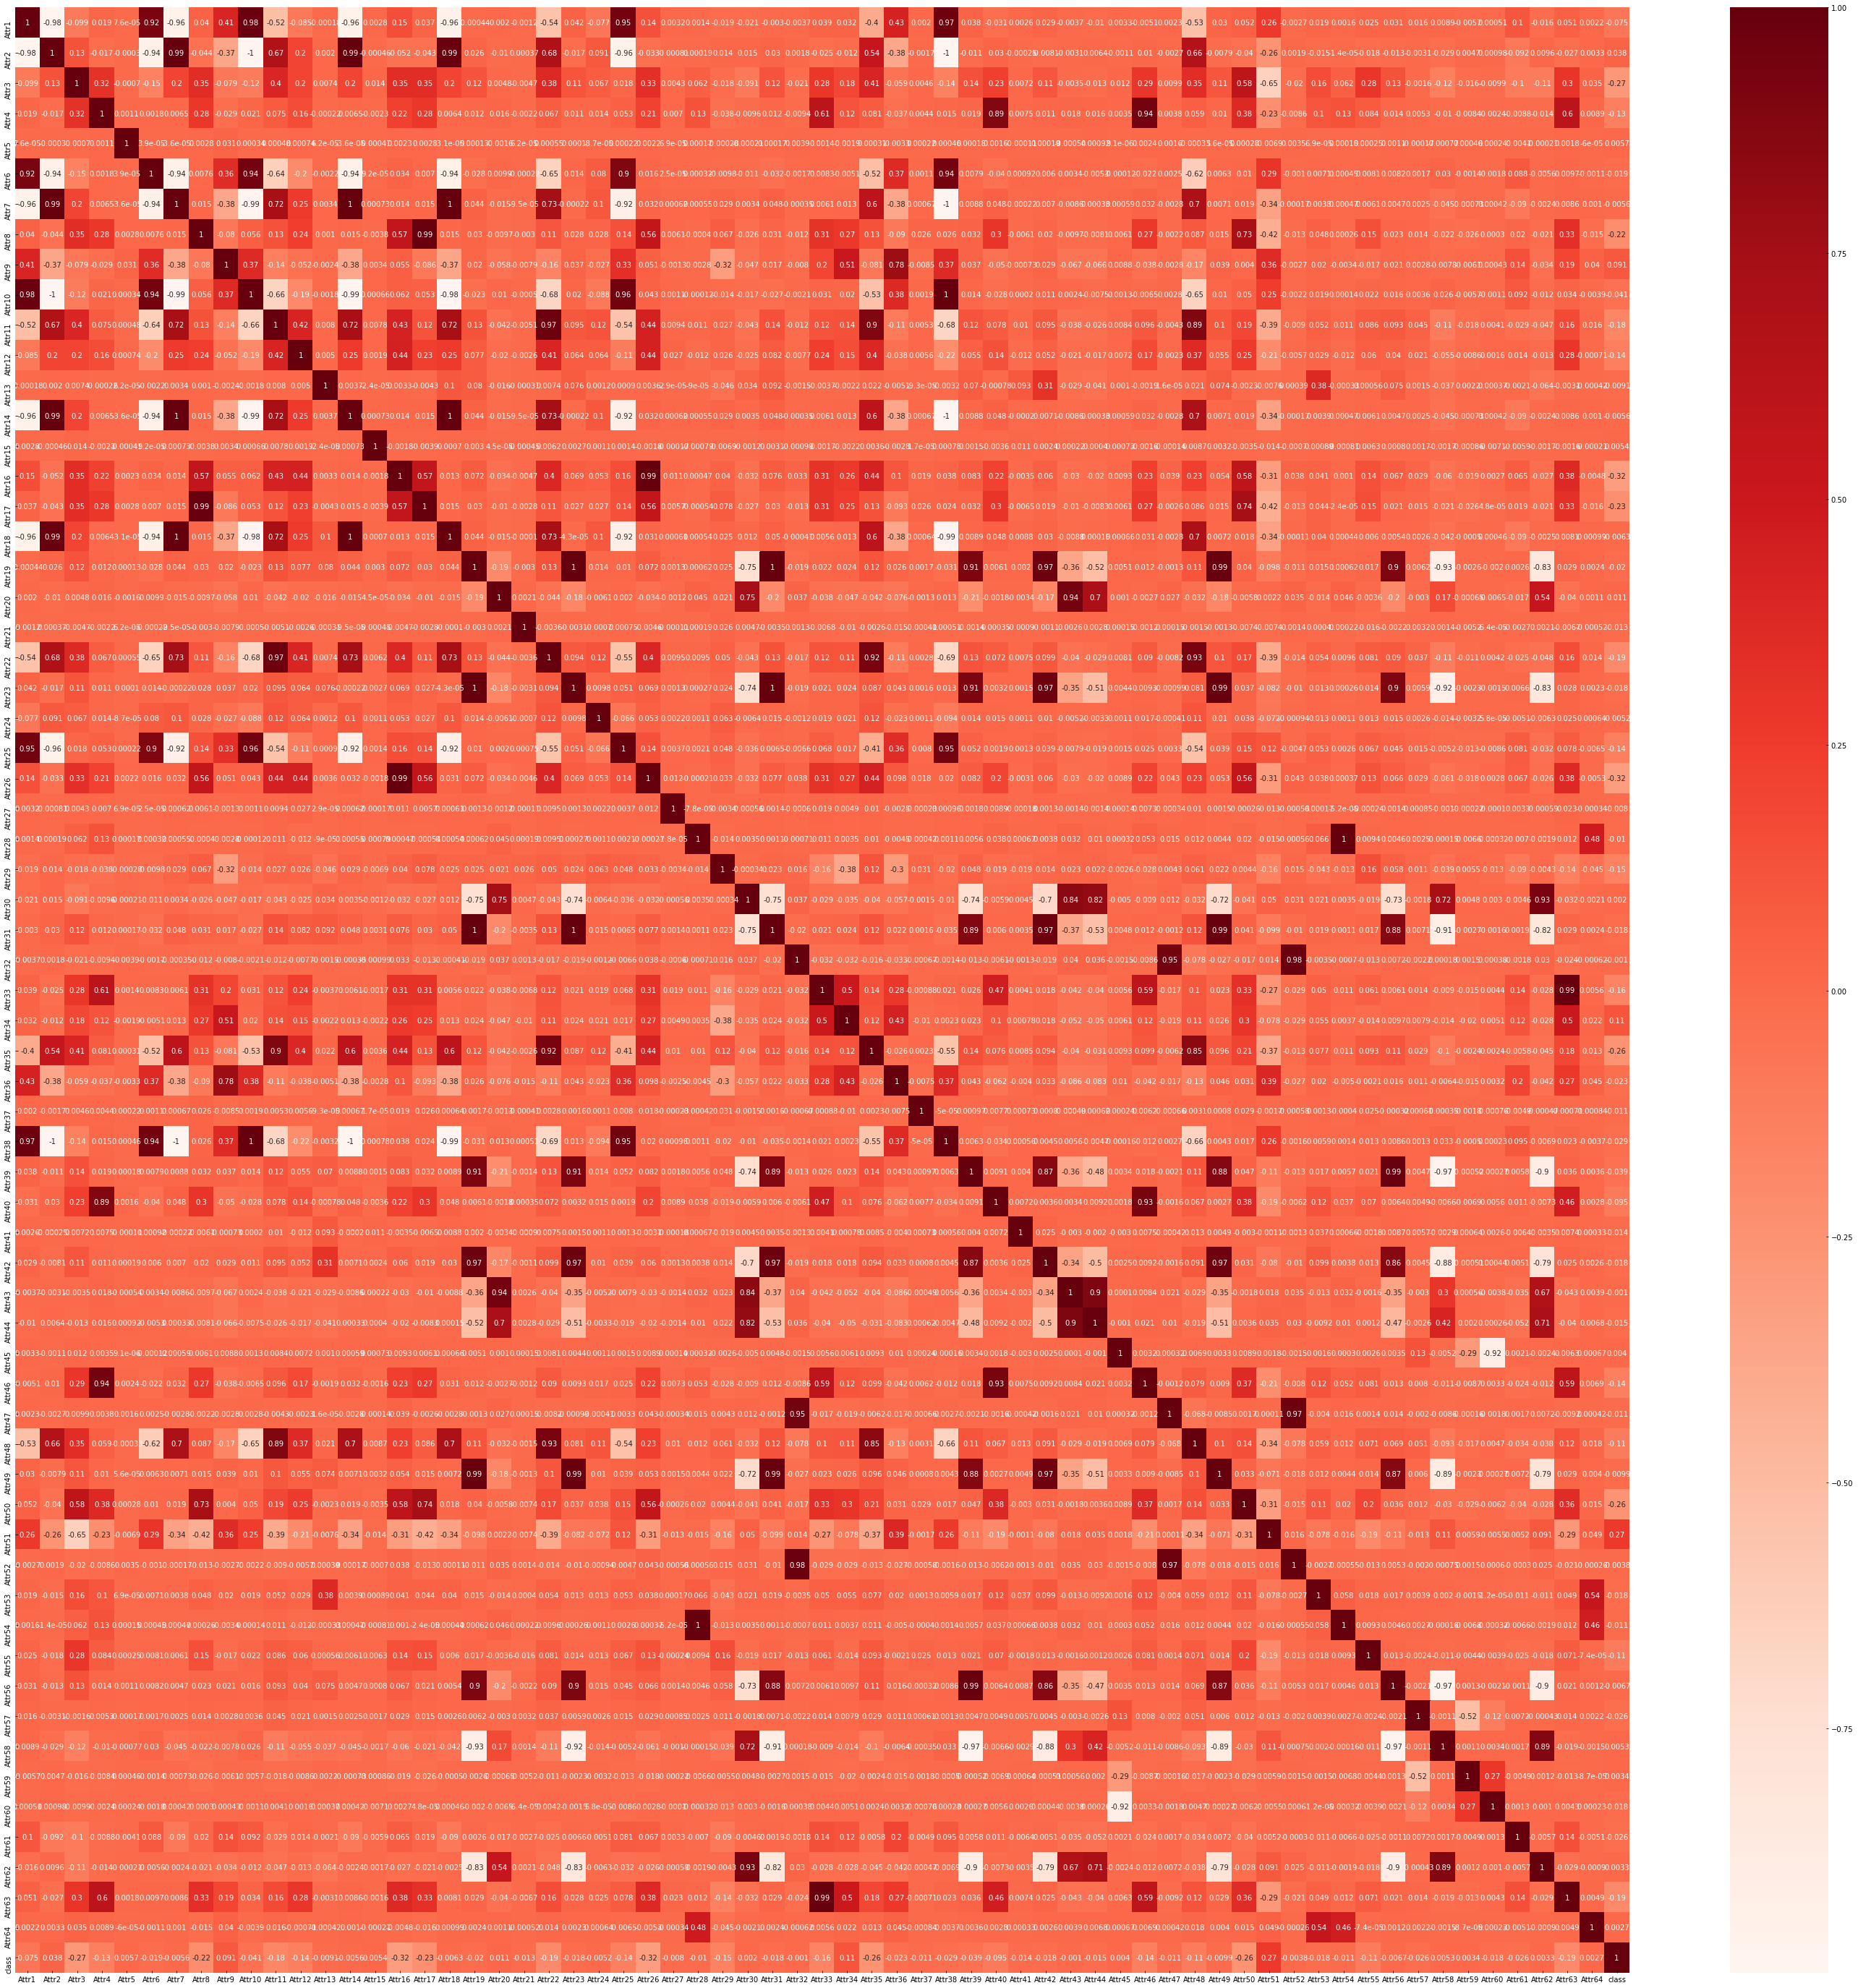

In [35]:
plt.figure(figsize=(50,50))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [0]:
#Correlation with output variable
cor_target = abs(cor["class"])

#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.02]

In [37]:
len(relevant_features)

31

In [0]:
col = df.columns
dropcol = []
for i in col:
  if i not in relevant_features:
    dropcol.append(i)
df = df.drop(dropcol,axis = 1)

In [39]:
df.head()

,Attr1,Attr2,Attr3,Attr4,Attr8,Attr9,Attr10,Attr11,Attr12,Attr16,Attr17,Attr22,Attr25,Attr26,Attr29,Attr33,Attr34,Attr35,Attr36,Attr38,Attr39,Attr40,Attr46,Attr48,Attr50,Attr51,Attr55,Attr57,Attr61,Attr63,class
0,-0.031545,-0.091313,-0.040269,-0.013529,0.641242,-0.748385,0.126789,-0.214423,-0.036576,-0.242796,0.579994,-0.403174,0.050225,-0.206675,-0.631107,-0.368646,-0.144382,-0.435600,-0.974157,0.079760,-0.016173,0.181241,0.147450,-0.147901,-0.192331,-1.027090,-0.110578,0.005457,-0.214478,-0.173939,0.0
1,-0.231729,-0.049448,0.304381,-0.080975,0.074710,0.469815,0.073759,-0.835505,-0.299606,-0.603332,0.040666,-0.873423,0.274101,-0.591456,-1.168550,0.021977,1.228971,-0.986256,0.189765,0.011069,-0.052642,-0.088079,-0.013532,-0.789621,0.186782,-0.079059,-0.114919,-0.008385,-0.205796,-0.073056,0.0
2,-0.058602,0.065060,-0.488404,-0.189489,-0.456287,0.270351,-0.071287,0.156944,-0.151208,-0.367159,-0.464823,0.152437,-0.114349,-0.339401,0.096212,-0.320198,0.059970,0.766162,-0.000812,-0.023796,0.068469,-0.147563,-0.234744,0.084584,-0.468628,0.393587,-0.123266,0.006779,0.019740,-0.291624,0.0
3,-0.069376,0.044641,-0.181684,-0.140032,-0.462971,-0.286746,-0.085266,-0.314756,-0.145529,-0.454498,-0.413685,-0.089462,-0.105949,-0.442992,0.296277,-0.577178,-0.643082,-0.100314,-1.069789,-0.004106,0.071021,-0.139320,-0.067912,0.079518,-0.515188,-0.267896,-0.077078,0.005384,-0.350519,-0.554685,0.0
4,0.236424,-0.051912,0.678337,-0.014680,0.097183,0.423405,0.076880,0.918860,0.208686,0.744187,0.062059,0.866831,-0.127631,0.675202,-0.501471,-0.069159,0.891985,1.004640,0.145423,0.019693,0.076296,0.017858,0.049879,0.615414,0.342874,-0.210252,-0.076644,0.025295,-0.181557,-0.027841,0.0


# Train Test Split

In [0]:
y = df['class']
X = df.drop('class',axis = 1) 
y = y.values
X = X.values

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42,shuffle = True)

In [42]:
print('Training Features Shape:', X_train.shape)
print('Training Labels Shape:', y_train.shape)
print('Testing Features Shape:', X_test.shape)
print('Testing Labels Shape:', y_test.shape)

Training Features Shape: (14695, 30)
Training Labels Shape: (14695,)
Testing Features Shape: (4899, 30)
Testing Labels Shape: (4899,)


In [0]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Model Building

In [44]:
model = SVC(probability=True)
model.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [0]:
pred = model.predict(X_test)

In [0]:
prob = model.predict_proba(X_test)

In [47]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,pred)

array([[1948,  480],
       [  53, 2418]])

In [48]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,pred) * 100

89.12022861808533

# Test Data

In [49]:
df_test = pd.read_csv("/content/drive/My Drive/Machine Learning/bankruptcy_Test_X.csv")
df_test.head()

,ID,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,Attr11,Attr12,Attr13,Attr14,Attr15,Attr16,Attr17,Attr18,Attr19,Attr20,Attr21,Attr22,Attr23,Attr24,Attr25,Attr26,Attr27,Attr28,Attr29,Attr30,Attr31,Attr32,Attr33,Attr34,Attr35,Attr36,Attr37,Attr38,Attr39,Attr40,Attr41,Attr42,Attr43,Attr44,Attr45,Attr46,Attr47,Attr48,Attr49,Attr50,Attr51,Attr52,Attr53,Attr54,Attr55,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64
0,1,-0.047250,0.021914,-0.479502,-0.188971,0.006633,-0.016047,-0.002986,-0.329514,0.375469,-0.016634,-0.249795,-0.145741,-0.011953,-0.002992,0.008342,-0.361397,-0.344137,-0.005081,0.006115,-0.016321,-0.015268,-0.384591,0.009899,-0.034303,0.022256,-0.333251,-0.009936,-0.020861,1.193393,-0.018606,0.011203,-0.015171,-0.341117,0.259079,-0.418782,0.099623,-0.033448,-0.039713,-0.016500,-0.096417,-0.007276,-0.012876,-0.017523,-0.015877,0.003988,-0.191949,-0.019760,-0.270192,0.006308,-0.295406,0.574289,-0.014527,-0.020433,-0.019761,-0.099951,0.011121,0.006535,-0.011163,-0.020783,-0.041831,-0.020144,-0.011491,-0.301879,-0.030549
1,2,-0.052601,-0.016568,-0.175990,-0.153471,0.007068,-0.018521,0.000176,-0.157408,0.116759,0.032111,-0.175399,-0.126963,-0.011374,0.000170,-0.005997,-0.232416,-0.180306,-0.001967,0.011318,-0.016419,-0.015782,-0.216514,0.010044,-0.042556,-0.059980,-0.243897,-0.009714,-0.019155,-0.468250,-0.019173,0.008893,-0.017623,-0.271165,0.445362,-0.227724,-0.147561,-0.032719,-0.009827,-0.000997,-0.124831,-0.007386,-0.001206,-0.013247,-0.011348,0.003992,-0.148674,-0.022731,-0.203003,0.009203,-0.147176,0.200948,-0.016984,-0.014009,-0.017853,-0.111767,0.009484,0.005082,-0.009624,-0.022003,-0.041819,-0.175267,-0.011735,-0.291649,-0.034183
2,3,-0.259217,0.046521,0.950983,-0.003660,0.006138,-0.016047,-0.039728,-0.407930,-0.757937,-0.047804,-0.781922,-0.316236,-0.015517,-0.039733,-0.066344,-0.687838,-0.418815,-0.041258,-0.098265,0.326758,-0.017247,-0.804517,-0.094671,-0.063524,-0.459221,-0.681645,-0.010105,-0.004210,-1.279877,0.006348,-0.081556,-0.002804,-0.517755,-0.320109,-0.919231,-0.983283,-0.034556,0.005134,-0.116843,-0.141577,-0.007764,-0.085824,0.046230,-0.003670,0.003448,-0.204495,0.082977,-0.583000,-0.083835,-0.113177,0.001399,-0.002133,-0.005380,-0.002679,-0.108811,0.007258,-0.021684,-0.006817,-0.008609,-0.047636,-0.270637,0.002269,-0.549296,-0.037978
3,4,0.088328,0.017722,-0.540323,-0.194584,0.007411,0.025332,0.028561,-0.326402,-0.366550,-0.018413,0.318726,-0.044947,-0.011812,0.028556,-0.013265,-0.053689,-0.329503,0.025982,0.016366,-0.070551,-0.014731,0.388869,0.016524,0.020788,0.060132,-0.082834,-0.009972,-0.021221,0.463268,-0.024915,0.011970,-0.025194,0.241806,-0.583648,0.427051,2.205310,-0.016294,-0.057617,0.006989,-0.065457,-0.007418,0.005808,-0.026562,-0.016710,0.010284,-0.091349,-0.042706,0.337470,0.030682,-0.234406,0.781933,-0.024571,-0.018674,-0.020355,-0.130015,0.009634,0.021932,-0.009791,-0.023085,0.076183,0.033484,-0.017165,0.187840,0.000147
4,5,0.011902,0.123401,0.730972,0.081123,0.008173,-0.000894,0.011519,-0.579511,-0.332887,-0.154648,0.002688,0.006495,-0.010183,0.011514,0.000210,-0.305759,-0.572108,0.009202,0.031915,-0.031292,-0.015367,0.058784,0.029161,-0.022138,-0.278317,-0.300371,-0.009952,-0.013624,0.813049,-0.006718,0.028447,-0.022328,-0.042313,-0.640521,0.063129,-0.360093,-0.034564,0.046063,0.032183,-0.075410,-0.007370,0.025461,-0.007818,-0.003227,0.004721,0.137676,-0.027476,0.009931,0.027393,-0.519688,-0.647166,-0.021700,-0.041020,-0.012765,0.282996,0.010097,0.067074,-0.010255,0.145350,-0.039437,-0.273849,-0.015402,-0.050778,-0.036754


In [0]:
colt = df_test.columns
dropcolt = []
for i in colt:
  if i not in relevant_features:
    dropcolt.append(i)
df_test = df_test.drop(dropcolt,axis = 1)

In [0]:
df_test = scaler.transform(df_test)

In [0]:
final_pred = model.predict(df_test)

In [53]:
df_y = pd.read_csv("/content/drive/My Drive/Machine Learning/bankruptcy_sample_Y.csv")
df_y.head()

,ID,class
0,1,0.111
1,2,0.222
2,3,0.342
3,4,0.111
4,5,0.555


In [0]:
df_y = df_y.drop(['class'], axis=1)

In [0]:
subm = pd.DataFrame({
        "ID": df_y["ID"],
        "class": final_pred
    })

subm.to_csv('submission.csv', index=False)